In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#IMPORT DATA

In [2]:
data_train = pd.read_csv("salju_train.csv")
data_test = pd.read_csv("salju_test.csv")

In [3]:
data_train

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [4]:
data_test

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


#PREPROCESSING

In [5]:
data_train.dropna(inplace=True)
data_train.drop(["id","Tanggal","BersaljuBesok"], axis=1, inplace=True)
data_train

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
3,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak
4,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak
5,C12,14.4,21.8,0.0,3.2,4.4,SW,39.0,SW,SSW,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,Tidak
6,C36,7.7,18.7,0.2,5.6,9.7,WNW,46.0,NW,WNW,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,Tidak
8,C8,18.4,35.3,0.0,10.0,12.5,ENE,33.0,E,ESE,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,C40,16.8,34.1,0.0,12.8,10.3,ENE,85.0,ENE,ENE,30.0,37.0,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,Tidak
109082,C2,8.7,19.0,0.0,1.4,9.6,W,24.0,W,SE,22.0,11.0,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,Tidak
109088,C25,14.3,26.2,0.0,8.0,12.6,NNE,50.0,NW,NE,13.0,33.0,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,Tidak
109090,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak


In [6]:
data_test.dropna(inplace=True)
data_test.drop(["Tanggal", "BersaljuBesok"], axis=1, inplace=True)
data_test

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
2,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No
3,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No
7,C3,14.4,22.4,0.0,4.4,3.9,SE,28.0,SW,SE,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,No
8,C31,20.3,33.7,0.0,11.8,11.1,E,52.0,E,ESE,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,No
10,C24,8.1,18.2,0.0,1.6,5.1,W,31.0,W,W,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,C3,13.4,24.9,0.0,6.2,9.7,E,31.0,ENE,NNE,13.0,13.0,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,No
18174,C12,14.6,27.8,0.0,6.6,10.1,NE,35.0,SE,ENE,13.0,24.0,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,No
18177,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No
18178,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No


#ENCODE CATEGORICAL DATA

In [7]:
encode = LabelEncoder()
data_train['KodeLokasi'] = encode.fit_transform(data_train['KodeLokasi'])
data_train['ArahAnginTerkencang'] = encode.fit_transform(data_train['ArahAnginTerkencang'])
data_train['ArahAngin9am'] = encode.fit_transform(data_train['ArahAngin9am'])
data_train['ArahAngin3pm'] = encode.fit_transform(data_train['ArahAngin3pm'])
data_train['BersaljuHariIni'] = encode.fit_transform(data_train['BersaljuHariIni'])

data_test['KodeLokasi'] = encode.fit_transform(data_test['KodeLokasi'])
data_test['ArahAnginTerkencang'] = encode.fit_transform(data_test['ArahAnginTerkencang'])
data_test['ArahAngin9am'] = encode.fit_transform(data_test['ArahAngin9am'])
data_test['ArahAngin3pm'] = encode.fit_transform(data_test['ArahAngin3pm'])
data_test['BersaljuHariIni'] = encode.fit_transform(data_test['BersaljuHariIni'])

In [8]:
data_train["Cluster"] = 0
data_train

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
3,15,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,23,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,2,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,15,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,24,18.4,35.3,0.0,10.0,12.5,1,33.0,0,2,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,18,16.8,34.1,0.0,12.8,10.3,1,85.0,1,1,30.0,37.0,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,4,8.7,19.0,0.0,1.4,9.6,13,24.0,13,9,22.0,11.0,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,6,14.3,26.2,0.0,8.0,12.6,5,50.0,7,4,13.0,33.0,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,17,20.1,23.7,0.0,7.2,8.9,2,43.0,9,2,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,0


#CORRELATION

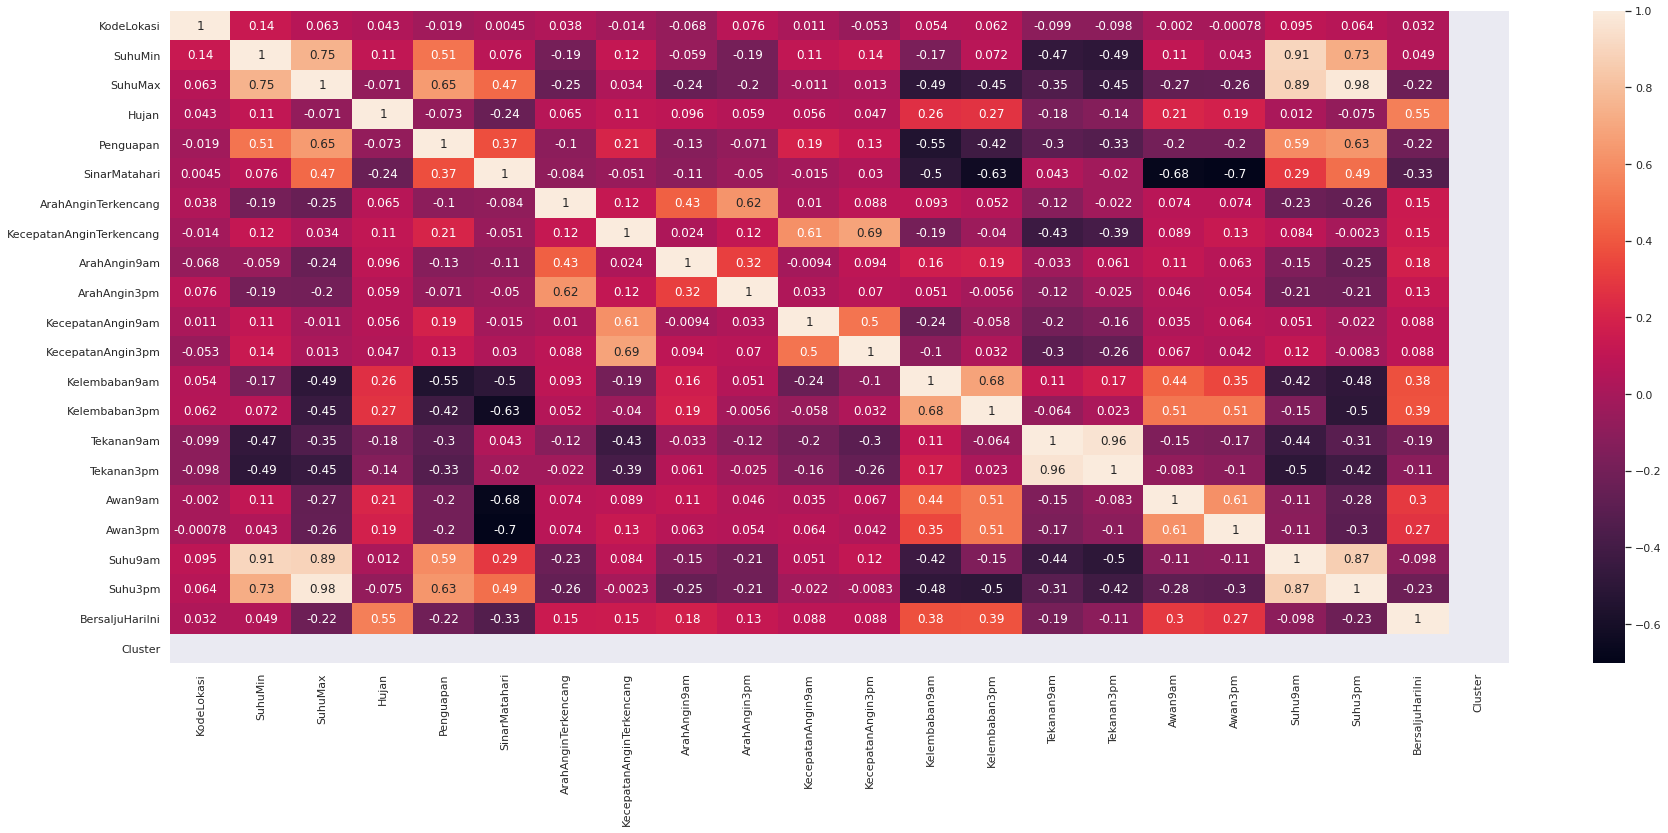

In [9]:
sns.set(rc={'figure.figsize':(30,12)})
sns.heatmap(data_train.corr(), annot=True)

#CENTROID

In [10]:
k = 3
data_train = data_train.head(5000)
centroid = data_train.sample(k)
centroid

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
6504,11,9.9,21.6,0.0,3.8,5.8,1,48.0,4,4,15.0,26.0,48.0,32.0,1020.9,1016.3,4.0,7.0,15.8,20.7,0,0
5128,0,13.6,24.1,0.4,2.6,0.5,6,30.0,11,8,6.0,6.0,83.0,49.0,1017.2,1013.3,8.0,7.0,17.3,23.2,0,0
5749,18,10.3,26.4,0.0,4.8,12.2,1,28.0,0,3,11.0,9.0,70.0,45.0,1021.4,1017.6,1.0,2.0,16.8,25.0,0,0


#KMEANS

In [11]:
def euclid(x,y):
  return np.sqrt(((x-y)**2).sum(axis=0))

In [12]:
def kmeans(centroid):
  jarak = 0
  for i in range(len(data_train)):
    cluster = []
    for j in range(k):
      cluster.append(euclid(centroid.iloc[j],data_train.iloc[i]))
    minimum = cluster.index(min(cluster))
    jarak += min(cluster)
    data_train['Cluster'].iloc[i] = minimum
  
  for i in range(k):
    centroid.iloc[i] = data_train[data_train.Cluster == i].mean()

  return jarak

#MAIN

In [13]:
temp = centroid.copy()
kmeans(centroid)
while 1:
  if centroid.equals(temp):
    break
  else:
    temp = centroid.copy()
    kmeans(centroid)

data_train["Cluster"] = data_train["Cluster"]+1
data_train

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
3,15,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,1
4,23,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,3
5,2,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,3
6,15,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,3
8,24,18.4,35.3,0.0,10.0,12.5,1,33.0,0,2,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,18,10.4,20.5,1.8,3.6,3.4,0,28.0,13,0,7.0,9.0,94.0,57.0,1008.2,1004.1,8.0,6.0,13.6,20.3,1,2
12751,17,15.4,21.1,0.0,6.6,10.2,11,33.0,11,11,17.0,24.0,63.0,55.0,1019.7,1018.2,7.0,1.0,19.3,20.1,0,3
12752,7,15.1,22.8,0.0,6.0,7.4,8,48.0,11,10,31.0,30.0,50.0,46.0,1023.8,1022.8,6.0,5.0,19.0,21.6,0,3
12755,13,13.2,34.2,0.0,5.0,9.0,3,43.0,5,3,13.0,24.0,68.0,17.0,1009.2,1005.8,1.0,7.0,17.1,31.5,0,1


#ANALYSIS

In [14]:
data_train[data_train['Cluster'] == 1]

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
3,15,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,1
8,24,18.4,35.3,0.0,10.0,12.5,1,33.0,0,2,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,1
9,11,13.7,29.1,0.0,9.0,13.1,2,41.0,2,12,7.0,26.0,41.0,36.0,1016.5,1013.2,0.0,1.0,23.7,28.3,0,1
21,15,16.9,34.7,0.0,11.4,12.5,9,35.0,2,15,19.0,6.0,39.0,12.0,1014.5,1011.3,0.0,0.0,22.2,32.6,0,1
45,5,13.7,32.1,0.0,7.6,10.3,3,26.0,4,15,13.0,11.0,36.0,21.0,1021.7,1019.1,2.0,6.0,23.3,30.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,1,12.1,27.4,0.0,9.4,8.9,2,37.0,9,9,17.0,22.0,40.0,35.0,1023.5,1019.0,5.0,3.0,19.4,27.0,0,1
12733,24,4.9,26.7,0.0,7.0,11.2,8,26.0,1,5,9.0,9.0,35.0,20.0,1028.6,1024.9,1.0,0.0,18.2,26.5,0,1
12745,1,17.8,30.5,0.0,8.0,10.0,0,39.0,0,2,17.0,19.0,53.0,29.0,1014.9,1011.3,2.0,6.0,24.2,29.7,0,1
12755,13,13.2,34.2,0.0,5.0,9.0,3,43.0,5,3,13.0,24.0,68.0,17.0,1009.2,1005.8,1.0,7.0,17.1,31.5,0,1


In [15]:
data_train[data_train['Cluster'] == 2]

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
24,3,11.7,17.6,6.2,2.2,5.7,13,72.0,7,6,19.0,22.0,95.0,82.0,1010.5,1010.5,8.0,6.0,12.3,14.7,1,2
40,24,10.8,19.7,9.0,0.8,3.6,6,35.0,4,7,7.0,13.0,99.0,73.0,1021.0,1017.7,6.0,7.0,15.1,18.1,1,2
47,2,21.9,29.3,2.4,3.0,8.3,1,35.0,2,4,13.0,28.0,71.0,75.0,1018.1,1014.9,6.0,5.0,25.6,27.6,1,2
52,11,13.2,22.2,5.0,3.4,6.8,14,54.0,5,14,11.0,31.0,90.0,58.0,1015.4,1013.7,7.0,6.0,16.1,21.4,1,2
59,13,6.5,14.9,6.4,2.4,3.8,12,52.0,12,8,31.0,19.0,72.0,64.0,1019.1,1016.7,7.0,7.0,10.4,13.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12709,9,6.9,13.4,18.0,0.6,4.1,12,33.0,11,11,17.0,15.0,100.0,78.0,1026.1,1024.5,5.0,7.0,8.6,12.4,1,2
12719,21,10.9,15.2,1.2,5.2,2.0,11,35.0,15,11,4.0,11.0,95.0,79.0,1010.6,1008.5,7.0,7.0,11.8,14.8,1,2
12729,25,17.5,27.1,0.0,4.8,10.7,4,28.0,14,4,2.0,13.0,76.0,68.0,1015.1,1011.5,2.0,2.0,22.8,25.5,0,2
12744,19,17.5,26.1,14.4,1.8,4.2,9,50.0,2,10,28.0,31.0,71.0,60.0,1015.5,1015.3,7.0,7.0,21.7,23.6,1,2


In [16]:
data_train[data_train['Cluster'] == 3]

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Cluster
4,23,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,3
5,2,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,3
6,15,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,3
11,0,-2.6,11.1,0.2,1.4,6.5,3,20.0,0,6,2.0,7.0,87.0,54.0,1027.1,1022.7,1.0,7.0,0.8,9.9,0,3
15,6,9.3,19.3,0.0,1.0,7.0,13,39.0,14,14,17.0,9.0,82.0,46.0,1018.7,1015.0,5.0,5.0,12.4,18.4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12740,9,8.6,23.8,0.0,6.4,12.5,12,43.0,5,12,6.0,24.0,77.0,46.0,1023.3,1021.8,1.0,0.0,13.6,22.3,0,3
12747,14,2.9,15.9,0.0,1.8,8.0,15,56.0,7,14,7.0,24.0,76.0,47.0,1003.0,1001.0,1.0,6.0,9.7,15.0,0,3
12748,13,0.0,13.1,0.0,1.4,8.3,3,24.0,3,6,15.0,9.0,75.0,43.0,1034.1,1031.6,0.0,5.0,3.9,12.6,0,3
12751,17,15.4,21.1,0.0,6.6,10.2,11,33.0,11,11,17.0,24.0,63.0,55.0,1019.7,1018.2,7.0,1.0,19.3,20.1,0,3


#VISUALIZATION

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_train1 = data_train.drop('Cluster', axis=1)
label = data_train['Cluster']
label = label.to_list()
pca = pca.fit_transform(data_train1)
df = pd.DataFrame()

df['x'] = pca[:,0]
df['y'] = pca[:,1]
df['cluster'] = label

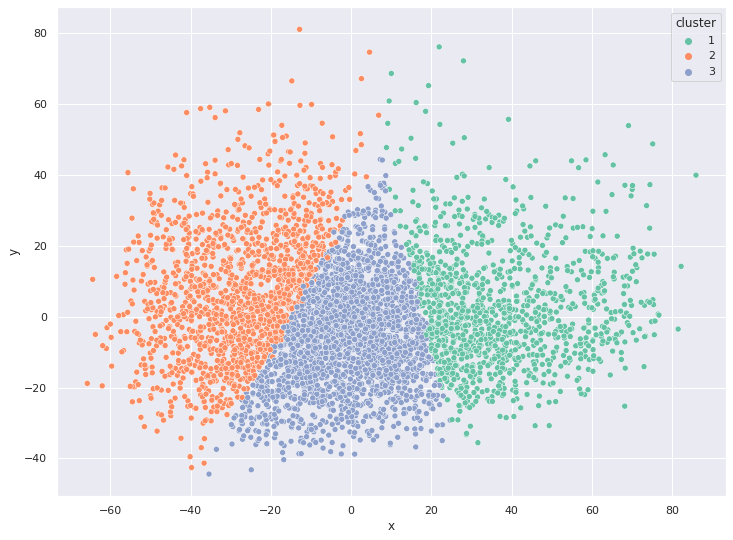

In [18]:
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(data=df, x= 'x', y='y', hue='cluster', palette="Set2")

#ELBOW METHOD

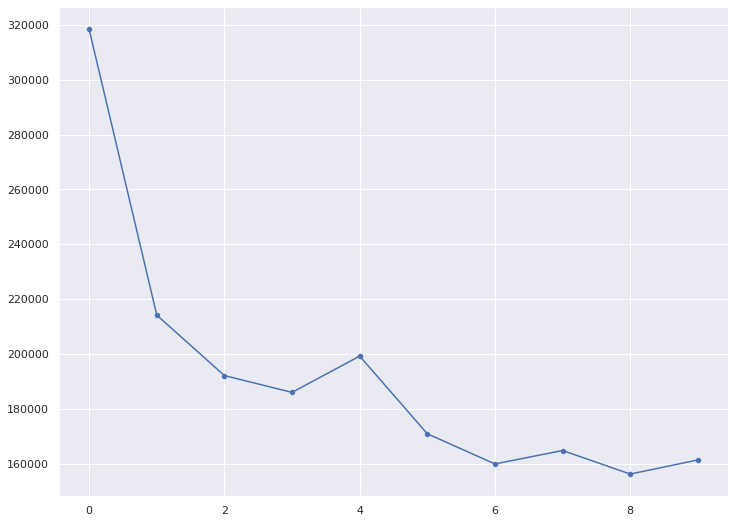

In [19]:
list1 = [y for y in range(1,11)]
arr_jarak = []
elbow = 0
for k in list1:
  centroid = data_train.sample(k)

  elbow = kmeans(centroid)
  arr_jarak.append(elbow)

sns.lineplot(data=arr_jarak)
sns.scatterplot(data=arr_jarak)